In [1]:
#
# The idea here is to show how one can use a Jupyter Notebook to write a lab-report 
# (or similar) where we keep the text, data, analysis, etc. together, while still 
# producing a nicely formatted PDF in the end. 
#
# Here, I use the regular scientific stack 
#
# - NumPy
# - SciPy 
# - SumPy 
#
# plus the library 
#
# - nbi_stat (available from https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)
#
# NumPy+SciPy+nbi_stat is used for the data manipulation and analysis, while 
# SymPy is used for derivations and calculations of expectations. 
#
# Note, the final title and author information is set in the notebooks metadata. 
#
# To make final PDF of this, do 
#
#    jupyter nbconvert --to latex --no-input NewtonSecondLaw.ipynb
#    xelatex NewtonSecondLaw.tex
#
# (Direct export from Jupyter interface is broken)
#
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import sympy as sy 
import sys 
sys.path.append('../statistics')
import nbi_stat as nbi 
from IPython.core.display import display, HTML, Latex

from matplotlib import rcParams 
    
rcParams['figure.max_open_warning'] = 0
rcParams['font.serif'] = ['Computer Modern Roman'] + rcParams['font.serif']
rcParams['font.family'] = ['serif']
rcParams['mathtext.fontset'] = 'cm'
rcParams['axes.formatter.use_mathtext'] = True

f = None
try:
    # IPython >= 7.23 depcrates set_matplotlib_formats
    from matplotlib_inline.backend_inline import set_matplotlib_formats
    f = set_matplotlib_formats
    
except Exception as e:
    try:
        from IPython.display import set_matplotlib_formats
        f = set_matplotlib_formats
    except Exception as e:
        pass 
if f is not None:
    set_matplotlib_formats('png','pdf')

_Sample Report_

> **Abstract**
>
> The position of a system of two masses was recorded as a function of time using a spark-timer apparatus. Using these data the instantaneous velocity was approximated by calculating the average velocity over 1/30 second time intervals. The acceleration of the system, which was calculated from the slope of a graph of velocity versus time, was $59\pm1\,\mathrm{cm}/\mathrm{s}^2$. The value of the acceleration predicted using Newton’s Second Law was $60.9\pm0.1\,\mathrm{cm}/\mathrm{s}^2$ . The discrepancy between these two values for the acceleration of the mass was only $3\%$.

# Experimental setup

In this experiment we verify Newton's Second Law by measuring the acceleration of a system subject to a net external force. Newton's second law states that the acceleration a of an object is directly
proportional to the net force acting on the object and inversely proportional to the object's mass $m$.
Newton's second law can be expressed as an equation using

$$F_{\mathrm{net}} = m a\quad.$$

The unbalanced force was supplied by a mass falling in the earth's gravitational field as is shown in
Figure 1. Mass $M$ rested on a smooth horizontal air track and was attached to mass $m$ by a light tape
passing over a pulley. When the system was released $M$ was pulled along the track by the force supplied
by the suspended mass $m$. The air track and pulley had small openings through which jets of air were
ejected to create a nearly frictionless surface. The two masses were connected by a very light recording
tape on which marks are made every 1/60 second by a spark timer.

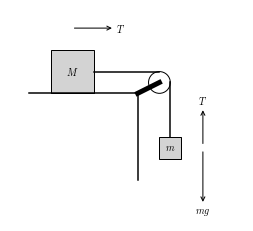

In [2]:
# Draw the set-up using matplotlib.  Alernatively, include 
# graphics instead
from matplotlib.patches import Rectangle, Circle
bigM = Rectangle((-4,0),2,2,facecolor='lightgray',edgecolor='k')
smlM = Rectangle((1,-3),1,1,facecolor='lightgray',edgecolor='k')
pul  = Circle((1,.5),.5,facecolor='none',edgecolor='k')
plt.gca().add_artist(bigM)
plt.gca().add_artist(smlM)
plt.gca().add_artist(pul)
plt.annotate(r'$M$',(-3,1),ha='center',va='center')
plt.annotate(r'$m$',(1.5,-2.5),ha='center',va='center')
plt.plot([-2,1],[1,1],color='k')
plt.plot([1.5,1.5],[.5,-2],color='k')
plt.plot([-5,0,0],[0,0,-4],color='k')
plt.plot([0,1],[0,.5],color='k',lw=5)
plt.annotate('$T$',(-3,3),xytext=(-1,3),va='center',
             arrowprops={'arrowstyle':'<-'})
plt.annotate('$T$',(3,-2.4),xytext=(3,-.5),ha='center',
             arrowprops={'arrowstyle':'<-'})
plt.annotate('$mg$',(3,-2.6),xytext=(3,-5.5),ha='center',
             arrowprops={'arrowstyle':'<-'})
plt.xlim(-6,5)
plt.ylim(-6,4)
plt.gca().set_aspect(1)
plt.gca().axis('off');

We ignored the friction in the pulley as well as the friction between the mass and the air track. Also, the
mass of the string was assumed to be negligible. With these assumptions Newton's second law was applied to $m$ and $M$. The resulting system of equations were solved to eliminate the tension in the string. 

The equation of motion 

$$m\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = F\quad,$$ 

for the mass $m$ becomes 

In [3]:
m, g, T, a = sy.symbols('m g T a',real=True,positive=True)
eq1 = sy.Eq(m*a,m*g-T)
display(Latex('$$'+sy.latex(eq1)+'$$'))

<IPython.core.display.Latex object>

while for the mass $M$ it becomes 

In [4]:
M = sy.symbols('M',real=True, positive=True)
eq2 = sy.Eq(a*M,T)
display(Latex('$$'+sy.latex(eq2)+'$$'))

<IPython.core.display.Latex object>

Isolating $T$ from the first equation 

In [5]:
t = sy.solve(eq1,T)[0]
display(Latex('$$'+sy.latex(sy.Eq(T,t))+'$$'))

<IPython.core.display.Latex object>

and inserting this in the second equation and then solving for $a$ yields 

In [6]:
sol = sy.solve(eq2.subs(T,t),a)[0]
display(Latex('$$'+sy.latex(sy.Eq(a,sol))+'$$'))

<IPython.core.display.Latex object>

for the predicted value of the acceleration of this system. We measured the velocity of $M$ by measuring the distance between marks on the tape and dividing by the time interval that occurred between the creation of the marks. A graph of velocity versus time was made. The slope of this linear graph was the constant acceleration of the system. This result was compared to the value predicted from Newton's second law given the equation above.

# Measurements 

The masses of the system shown above were determined to be 

In [7]:
mv = 10.23
Mv = 154.34
dmv = 0.02
dMv = 0.02
display(Latex(r'\begin{align*}'
              + 'm &= '
              + nbi.format_result(mv,dmv,expo=False,
                                  unit=r"\mathrm{g}") + r'\\' + '\n'
              + 'M &= '
              + nbi.format_result(Mv,dMv,expo=False,
                                  unit=r"\mathrm{g}") + r'\\' + '\n'
              + r'\end{align*}'))

<IPython.core.display.Latex object>

using a mechanical balance.  Thus, the expected acceleration becomes, using the solution above and setting

In [8]:
gv  = 980
display(Latex(fr'$$g={gv}\,\mathrm{{cm}}^2/\mathrm{{s}}$$'))

<IPython.core.display.Latex object>

and using regular error propagation, 

In [9]:
apredf = sy.lambdify((m,M,g),sol)
apred  = apredf(mv,Mv,gv)
dapred = np.sqrt(nbi.propagate_uncertainty(lambda p:apredf(p[0],p[1],gv),[mv,Mv],[dmv,dMv]))
display(Latex('$$a = '+nbi.format_result(apred,dapred,expo=False,
                                         unit=r"\mathrm{cm}^2/\mathrm{s}")+'$$'))

<IPython.core.display.Latex object>

The position of the marks on the spark tape were measured using a meter stick and recorded to the nearest $0.02\,\mathrm{cm}$. The instantaneous
velocity at each twelfth dot which was estimated using the formula for average velocity

$$v_i = \frac{\Delta x_i}{\Delta t_i} = \frac{x_{i+1}-x_{i-1}}{t_{i+1}-t_{i-1}}\quad,$$ 

where $i$ is the dot number and 

$$t_i = i \frac{1}{60\,\mathrm{1/s}}\quad.$$

Thus, 

$$\Delta t_i = \Delta t = \left[(i+1)-(i-1)\right] \frac{1}{60\,\mathrm{1/s}} = \frac{1}{30}\,\mathrm{s}\quad.$$

The table below summarises the measurements done. 

In [10]:
# t is the dot numbers where x is measured
t = np.array([[11, 12, 13],
              [23, 24, 25],
              [35, 36, 37],
              [47, 48, 49],
              [59, 60, 61],
              [71, 72, 73]])
# x is the measured distance on the tape 
x = np.array([[15.78, 16.39, 17.02],
              [24.33, 25.16, 26.00],
              [35.26, 36.28, 37.30],
              [48.52, 49.76, 51.03],
              [64.25, 65.61, 67.04],
              [82.22, 83.82, 85.45]])
# 'Stack' the arrays above for printing below
da = np.hstack((t,x))
display(Latex(nbi.format_data_table(da,nsig=4,
                                    borders='TBH',fmt='ccc|ccc',
                                    columns=[r'\rlap{\text{Dot group}}','','',
                                             r'\rlap{\text{Distance (cm)}}','',''])))

<IPython.core.display.Latex object>

The velocities for each row is calculated according to the formula above.  From regular propagation of uncertainties we find

$$\delta_v = \frac{\sqrt{\delta_x^2 + \delta_x^2}}{\Delta t} = \frac{\sqrt{2\cdot(0.02\,\mathrm{cm})^2}}{1/30\,\mathrm{s}}\quad,$$ 

since $\delta_x=0.02\,\mathrm{cm}$ at all points.  We find

In [11]:
# dx is the precision with which the measurement was made 
dx = 0.02 
# dt is the time spacing between points 
dt = 1 / 60
# The uncertainty on the velocities 
dv = np.sqrt((dx**2+dx**2))/(2*dt)
display(Latex(fr'$$\delta_v = {nbi.round(dv,1)}\,\mathrm{{cm}}/\mathrm{{s}}$$'))

<IPython.core.display.Latex object>

# Results 

With this, we can calculate the velocity for each line in the table above, and fit a straight line to $v(t)$ with the uncertainty $\delta_v$

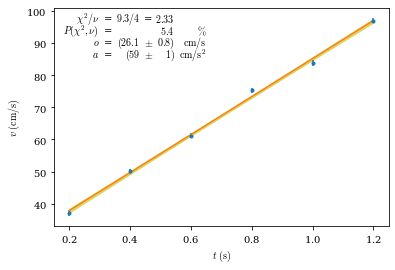

In [12]:
# Function to calculate the velocity 
def vel(t,x,dt=dt):
    return (x[:,2]-x[:,0]) / ((t[:,2]-t[:,0])*dt)
# Calculated velocities 
v = vel(t,x)
f = [lambda x: np.ones_like(x), lambda x: x]
ff = lambda x,*p : sum([pp*fff(x) for pp,fff in zip(p,f)])
tt = t[:,1]*dt
p, cov = nbi.fit(f,tt,v,dv*np.ones_like(v))
nbi.fit_plot(tt,v,dv*np.ones_like(v),ff,p,cov,
             table={'loc':'upper left'},
             data={'fmt':'.'},
             parameters=[dict(label='o',unit=r'$\mathrm{cm}/\mathrm{s}$'),
                         dict(label='a',unit=r'$\mathrm{cm}/\mathrm{s}^2$')]);
plt.xlabel(r'$t\ (\mathrm{s})$')
plt.ylabel(r'$v\ (\mathrm{cm}/\mathrm{s})$');

Thus, we see a good correspondence between the measured and expected value _within two $\sigma$_, as shown below. 

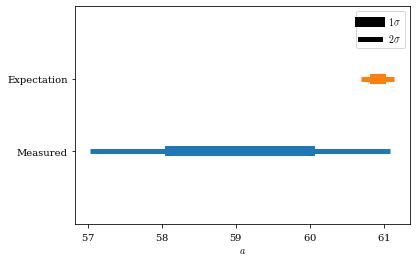

In [13]:
plt.errorbar(p[1],  0, 0,   np.sqrt(cov[1,1]),lw=10)
plt.errorbar(p[1],  0, 0, 2*np.sqrt(cov[1,1]),lw=5,color='C0')
plt.errorbar(apred, 1, 0,   dapred,   lw=10)
plt.errorbar(apred, 1, 0, 2*dapred,   lw=5, color='C1')
plt.yticks([0,1],['Measured','Expectation'])
plt.ylim([-1,2])
plt.xlabel('$a$')
l1 = Line2D([],[],lw=10,color='k')
l2 = Line2D([],[],lw=5,color='k')
plt.legend([l1,l2],[r'$1\sigma$',r'$2\sigma$']);

# Discussion 

Even thought the measurement and the predicted values of the acceleration do not agree within $1\sigma$, they do agree within $2\sigma$.   Albeit care has been taken in setting up the experiment in such a way that our assumptions are reasonable 

- Frictionless motion of the mass $M$ 
- Weightless cord 
- Frictionless pulley 

we can not fully rule out these effects.  In particular, any friction in by the air-table on the mass $M$, or friction in the pulley would _slow down_ the acceleration.  Thus, with more knowledge of these effects and proper accounting in our fitting model, we are confident that better agreement could be obtained between the measurement and the prediction. 